# Data Analysis of WeRateDogs Twitter archive

### Introduction
This file shows the complete analysis of data collected from WeRateDogs twitter handle.  


### Questions
1. Which dog stage is the most popular?
2. Which breed of dog is most loved by the people?
3. Most popular twitter source

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import time
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

### Data Gathering 

In [2]:
#Download 'twitter-archive-enhanced.csv' manually and read to check if it was gathered successfuully.
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [68]:
#This creates a file 'image-predictions.tsv' using requests library.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as infile:
          infile.write(response.content)

In [4]:
image_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [6]:
twitter_arch.shape

(2356, 17)

In [7]:
image_df.shape

(2075, 12)

Using tweepy API, more data is gathered.

In [8]:
consumer_key = '********'
consumer_secret = '********'
access_token = '********'
access_secret = '********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [41]:
tweet_json_col = 'id' + ' ' + 'retweet_count' + ' ' + 'favorite_count'
with open(os.path.join('tweet_json.csv'),mode='w') as infile:
    infile.write(tweet_json_col)
    infile.write('\n')

In [42]:
def gather(tw):
    tweet = api.get_status(twitter_arch.tweet_id[tw],tweet_mode='extended')
    tw_id = str(tweet._json['id'])
    retweet = str(tweet._json['retweet_count'])
    fav = str(tweet._json['favorite_count'])
    json_tweet = tw_id + " " + retweet + " " + fav
    print('{} of 2356 tweet ids queried'.format(tw+1))
    with open(os.path.join('tweet_json.csv'),mode='a') as outfile:
        outfile.write(json_tweet)
        outfile.write('\n') 
    
cnt = 0
missing = list()
start=time.time()

for tw in range(len(twitter_arch.tweet_id)):
    try:
        gather(tw)
    except:
        print('{} was not found'.format(tw))
        missing.append(twitter_arch.tweet_id[tw])
        
end=time.time()
print('Total time elapsed:{}'.format(start-end))

1 of 2356 tweet ids queried
2 of 2356 tweet ids queried
3 of 2356 tweet ids queried
4 of 2356 tweet ids queried
5 of 2356 tweet ids queried
6 of 2356 tweet ids queried
7 of 2356 tweet ids queried
8 of 2356 tweet ids queried
9 of 2356 tweet ids queried
10 of 2356 tweet ids queried
11 of 2356 tweet ids queried
12 of 2356 tweet ids queried
13 of 2356 tweet ids queried
14 of 2356 tweet ids queried
15 of 2356 tweet ids queried
16 of 2356 tweet ids queried
17 of 2356 tweet ids queried
18 of 2356 tweet ids queried
19 of 2356 tweet ids queried
19 was not found
21 of 2356 tweet ids queried
22 of 2356 tweet ids queried
23 of 2356 tweet ids queried
24 of 2356 tweet ids queried
25 of 2356 tweet ids queried
26 of 2356 tweet ids queried
27 of 2356 tweet ids queried
28 of 2356 tweet ids queried
29 of 2356 tweet ids queried
30 of 2356 tweet ids queried
31 of 2356 tweet ids queried
32 of 2356 tweet ids queried
33 of 2356 tweet ids queried
34 of 2356 tweet ids queried
35 of 2356 tweet ids queried
36 of 

282 of 2356 tweet ids queried
283 of 2356 tweet ids queried
284 of 2356 tweet ids queried
285 of 2356 tweet ids queried
286 of 2356 tweet ids queried
287 of 2356 tweet ids queried
288 of 2356 tweet ids queried
289 of 2356 tweet ids queried
290 of 2356 tweet ids queried
291 of 2356 tweet ids queried
292 of 2356 tweet ids queried
293 of 2356 tweet ids queried
294 of 2356 tweet ids queried
295 of 2356 tweet ids queried
296 of 2356 tweet ids queried
297 of 2356 tweet ids queried
298 of 2356 tweet ids queried
298 was not found
300 of 2356 tweet ids queried
301 of 2356 tweet ids queried
302 of 2356 tweet ids queried
303 of 2356 tweet ids queried
304 of 2356 tweet ids queried
305 of 2356 tweet ids queried
306 of 2356 tweet ids queried
307 of 2356 tweet ids queried
308 of 2356 tweet ids queried
309 of 2356 tweet ids queried
310 of 2356 tweet ids queried
311 of 2356 tweet ids queried
312 of 2356 tweet ids queried
313 of 2356 tweet ids queried
314 of 2356 tweet ids queried
315 of 2356 tweet ids 

557 of 2356 tweet ids queried
558 of 2356 tweet ids queried
559 of 2356 tweet ids queried
560 of 2356 tweet ids queried
561 of 2356 tweet ids queried
562 of 2356 tweet ids queried
563 of 2356 tweet ids queried
564 of 2356 tweet ids queried
565 of 2356 tweet ids queried
566 of 2356 tweet ids queried
566 was not found
568 of 2356 tweet ids queried
569 of 2356 tweet ids queried
570 of 2356 tweet ids queried
571 of 2356 tweet ids queried
572 of 2356 tweet ids queried
573 of 2356 tweet ids queried
574 of 2356 tweet ids queried
575 of 2356 tweet ids queried
576 of 2356 tweet ids queried
577 of 2356 tweet ids queried
578 of 2356 tweet ids queried
579 of 2356 tweet ids queried
580 of 2356 tweet ids queried
581 of 2356 tweet ids queried
582 of 2356 tweet ids queried
583 of 2356 tweet ids queried
584 of 2356 tweet ids queried
585 of 2356 tweet ids queried
586 of 2356 tweet ids queried
587 of 2356 tweet ids queried
588 of 2356 tweet ids queried
589 of 2356 tweet ids queried
590 of 2356 tweet ids 

832 of 2356 tweet ids queried
833 of 2356 tweet ids queried
834 of 2356 tweet ids queried
835 of 2356 tweet ids queried
836 of 2356 tweet ids queried
837 of 2356 tweet ids queried
838 of 2356 tweet ids queried
839 of 2356 tweet ids queried
840 of 2356 tweet ids queried
841 of 2356 tweet ids queried
842 of 2356 tweet ids queried
843 of 2356 tweet ids queried
844 of 2356 tweet ids queried
845 of 2356 tweet ids queried
846 of 2356 tweet ids queried
847 of 2356 tweet ids queried
848 of 2356 tweet ids queried
849 of 2356 tweet ids queried
850 of 2356 tweet ids queried
851 of 2356 tweet ids queried
852 of 2356 tweet ids queried
853 of 2356 tweet ids queried
854 of 2356 tweet ids queried
855 of 2356 tweet ids queried
856 of 2356 tweet ids queried
857 of 2356 tweet ids queried
858 of 2356 tweet ids queried
859 of 2356 tweet ids queried
860 of 2356 tweet ids queried
861 of 2356 tweet ids queried
862 of 2356 tweet ids queried
863 of 2356 tweet ids queried
864 of 2356 tweet ids queried
865 of 235

Rate limit reached. Sleeping for: 56


901 of 2356 tweet ids queried
902 of 2356 tweet ids queried
903 of 2356 tweet ids queried
904 of 2356 tweet ids queried
905 of 2356 tweet ids queried
906 of 2356 tweet ids queried
907 of 2356 tweet ids queried
908 of 2356 tweet ids queried
909 of 2356 tweet ids queried
910 of 2356 tweet ids queried
911 of 2356 tweet ids queried
912 of 2356 tweet ids queried
913 of 2356 tweet ids queried
914 of 2356 tweet ids queried
915 of 2356 tweet ids queried
916 of 2356 tweet ids queried
917 of 2356 tweet ids queried
918 of 2356 tweet ids queried
919 of 2356 tweet ids queried
920 of 2356 tweet ids queried
921 of 2356 tweet ids queried
922 of 2356 tweet ids queried
923 of 2356 tweet ids queried
924 of 2356 tweet ids queried
925 of 2356 tweet ids queried
926 of 2356 tweet ids queried
927 of 2356 tweet ids queried
928 of 2356 tweet ids queried
929 of 2356 tweet ids queried
930 of 2356 tweet ids queried
931 of 2356 tweet ids queried
932 of 2356 tweet ids queried
932 was not found
934 of 2356 tweet ids 

1169 of 2356 tweet ids queried
1170 of 2356 tweet ids queried
1171 of 2356 tweet ids queried
1172 of 2356 tweet ids queried
1173 of 2356 tweet ids queried
1174 of 2356 tweet ids queried
1175 of 2356 tweet ids queried
1176 of 2356 tweet ids queried
1177 of 2356 tweet ids queried
1178 of 2356 tweet ids queried
1179 of 2356 tweet ids queried
1180 of 2356 tweet ids queried
1181 of 2356 tweet ids queried
1182 of 2356 tweet ids queried
1183 of 2356 tweet ids queried
1184 of 2356 tweet ids queried
1185 of 2356 tweet ids queried
1186 of 2356 tweet ids queried
1187 of 2356 tweet ids queried
1188 of 2356 tweet ids queried
1189 of 2356 tweet ids queried
1190 of 2356 tweet ids queried
1191 of 2356 tweet ids queried
1192 of 2356 tweet ids queried
1193 of 2356 tweet ids queried
1194 of 2356 tweet ids queried
1195 of 2356 tweet ids queried
1196 of 2356 tweet ids queried
1197 of 2356 tweet ids queried
1198 of 2356 tweet ids queried
1199 of 2356 tweet ids queried
1200 of 2356 tweet ids queried
1201 of 

1434 of 2356 tweet ids queried
1435 of 2356 tweet ids queried
1436 of 2356 tweet ids queried
1437 of 2356 tweet ids queried
1438 of 2356 tweet ids queried
1439 of 2356 tweet ids queried
1440 of 2356 tweet ids queried
1441 of 2356 tweet ids queried
1442 of 2356 tweet ids queried
1443 of 2356 tweet ids queried
1444 of 2356 tweet ids queried
1445 of 2356 tweet ids queried
1446 of 2356 tweet ids queried
1447 of 2356 tweet ids queried
1448 of 2356 tweet ids queried
1449 of 2356 tweet ids queried
1450 of 2356 tweet ids queried
1451 of 2356 tweet ids queried
1452 of 2356 tweet ids queried
1453 of 2356 tweet ids queried
1454 of 2356 tweet ids queried
1455 of 2356 tweet ids queried
1456 of 2356 tweet ids queried
1457 of 2356 tweet ids queried
1458 of 2356 tweet ids queried
1459 of 2356 tweet ids queried
1460 of 2356 tweet ids queried
1461 of 2356 tweet ids queried
1462 of 2356 tweet ids queried
1463 of 2356 tweet ids queried
1464 of 2356 tweet ids queried
1465 of 2356 tweet ids queried
1466 of 

1699 of 2356 tweet ids queried
1700 of 2356 tweet ids queried
1701 of 2356 tweet ids queried
1702 of 2356 tweet ids queried
1703 of 2356 tweet ids queried
1704 of 2356 tweet ids queried
1705 of 2356 tweet ids queried
1706 of 2356 tweet ids queried
1707 of 2356 tweet ids queried
1708 of 2356 tweet ids queried
1709 of 2356 tweet ids queried
1710 of 2356 tweet ids queried
1711 of 2356 tweet ids queried
1712 of 2356 tweet ids queried
1713 of 2356 tweet ids queried
1714 of 2356 tweet ids queried
1715 of 2356 tweet ids queried
1716 of 2356 tweet ids queried
1717 of 2356 tweet ids queried
1718 of 2356 tweet ids queried
1719 of 2356 tweet ids queried
1720 of 2356 tweet ids queried
1721 of 2356 tweet ids queried
1722 of 2356 tweet ids queried
1723 of 2356 tweet ids queried
1724 of 2356 tweet ids queried
1725 of 2356 tweet ids queried
1726 of 2356 tweet ids queried
1726 was not found
1728 of 2356 tweet ids queried
1729 of 2356 tweet ids queried
1730 of 2356 tweet ids queried
1731 of 2356 tweet i

Rate limit reached. Sleeping for: 46


1801 of 2356 tweet ids queried
1802 of 2356 tweet ids queried
1803 of 2356 tweet ids queried
1804 of 2356 tweet ids queried
1805 of 2356 tweet ids queried
1806 of 2356 tweet ids queried
1807 of 2356 tweet ids queried
1808 of 2356 tweet ids queried
1809 of 2356 tweet ids queried
1810 of 2356 tweet ids queried
1811 of 2356 tweet ids queried
1812 of 2356 tweet ids queried
1813 of 2356 tweet ids queried
1814 of 2356 tweet ids queried
1815 of 2356 tweet ids queried
1816 of 2356 tweet ids queried
1817 of 2356 tweet ids queried
1818 of 2356 tweet ids queried
1819 of 2356 tweet ids queried
1820 of 2356 tweet ids queried
1821 of 2356 tweet ids queried
1822 of 2356 tweet ids queried
1823 of 2356 tweet ids queried
1824 of 2356 tweet ids queried
1825 of 2356 tweet ids queried
1826 of 2356 tweet ids queried
1827 of 2356 tweet ids queried
1828 of 2356 tweet ids queried
1829 of 2356 tweet ids queried
1830 of 2356 tweet ids queried
1831 of 2356 tweet ids queried
1832 of 2356 tweet ids queried
1833 of 

2066 of 2356 tweet ids queried
2067 of 2356 tweet ids queried
2068 of 2356 tweet ids queried
2069 of 2356 tweet ids queried
2070 of 2356 tweet ids queried
2071 of 2356 tweet ids queried
2072 of 2356 tweet ids queried
2073 of 2356 tweet ids queried
2074 of 2356 tweet ids queried
2075 of 2356 tweet ids queried
2076 of 2356 tweet ids queried
2077 of 2356 tweet ids queried
2078 of 2356 tweet ids queried
2079 of 2356 tweet ids queried
2080 of 2356 tweet ids queried
2081 of 2356 tweet ids queried
2082 of 2356 tweet ids queried
2083 of 2356 tweet ids queried
2084 of 2356 tweet ids queried
2085 of 2356 tweet ids queried
2086 of 2356 tweet ids queried
2087 of 2356 tweet ids queried
2088 of 2356 tweet ids queried
2089 of 2356 tweet ids queried
2090 of 2356 tweet ids queried
2091 of 2356 tweet ids queried
2092 of 2356 tweet ids queried
2093 of 2356 tweet ids queried
2094 of 2356 tweet ids queried
2095 of 2356 tweet ids queried
2096 of 2356 tweet ids queried
2097 of 2356 tweet ids queried
2098 of 

2331 of 2356 tweet ids queried
2332 of 2356 tweet ids queried
2333 of 2356 tweet ids queried
2334 of 2356 tweet ids queried
2335 of 2356 tweet ids queried
2336 of 2356 tweet ids queried
2337 of 2356 tweet ids queried
2338 of 2356 tweet ids queried
2339 of 2356 tweet ids queried
2340 of 2356 tweet ids queried
2341 of 2356 tweet ids queried
2342 of 2356 tweet ids queried
2343 of 2356 tweet ids queried
2344 of 2356 tweet ids queried
2345 of 2356 tweet ids queried
2346 of 2356 tweet ids queried
2347 of 2356 tweet ids queried
2348 of 2356 tweet ids queried
2349 of 2356 tweet ids queried
2350 of 2356 tweet ids queried
2351 of 2356 tweet ids queried
2352 of 2356 tweet ids queried
2353 of 2356 tweet ids queried
2354 of 2356 tweet ids queried
2355 of 2356 tweet ids queried
2356 of 2356 tweet ids queried
Total time elapsed:-2331.6993656158447


In [7]:
df_retweet = pd.read_csv('tweet_json.csv',sep=' ')
df_retweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8213,37692
1,892177421306343426,6075,32377
2,891815181378084864,4017,24383
3,891689557279858688,8370,41011
4,891327558926688256,9075,39211


In [9]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Data Wrangling

#### Data Quality Issues
1. *Lot of missing values in in_reply_to status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.*
2. *Extra '+0000' in timestamp column.*
3. *Trim the 'source' column to make it more readable.*
4. *Some errors while fetching 'rating_numerator' column values from 'text' column.*
5. *'rating_denominator' must have all values equal to 10.*
6. *Weird names in 'names' column.*
7. *Change the datatype of timestamp column*
8. *Make column names more readable in image_df Columns affected: p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog and p3_dog.*
9. *p1,p2 and p3 column values in image_df have inconsistent cases.*

#### Tidiness issues
1. *df_retweet dataframe should be merged with twitter_arch dataframe.*
2. *duggo, floofer, pupper and puppo columns must be consolidated to a single column "stage".*

#### Define
1. *Dropping columns in_reply_to status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.*

In [9]:
twitter_arch_copy = twitter_arch.copy()
twitter_arch_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Code

In [10]:
#Dropping columns
twitter_arch_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],inplace=True)

#### Test

In [11]:
twitter_arch_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define
2. Trim '+0000' from timestamp column values

#### Code

In [12]:
twitter_arch_copy['timestamp'] = twitter_arch_copy['timestamp'].str[:-6]

#### Test

In [13]:
twitter_arch_copy.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-21 01:02:36
20      2017-07-20 16:49:33
21      2017-07-19 16:06:48
22      2017-07-19 03:39:09
23      2017-07-19 00:47:34
24      2017-07-18 16:08:03
25      2017-07-18 00:07:08
26      2017-07-17 16:17:36
27      2017-07-16 23:58:41
28      2017-07-16 20:14:00
29      2017-07-15 23:25:31
               ...         
2326    2015-11-17 00:24:19
2327    2015-11-17 00:06:54
2328    2015-11-16 23:23:41
2329    2015-11-16 21:54:18
2330    2015-11-16 2

#### Define
3. Make 'source' column more readable

#### Code

In [14]:
for src in range(len(twitter_arch_copy.source)):
    twitter_arch_copy['source'][src] = twitter_arch_copy['source'][src].split('>')[1][:-3]

H:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [15]:
twitter_arch_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [16]:
twitter_arch_copy.source.values

array(['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for iPhone', 'Twitter for iPhone',
       'Twitter for iPhone'], dtype=object)

#### Define
4. Fix rating_numerator column values 

#### Code

In [17]:
import re
rating_num_idx = []
rating_num_idx_2 = []
for idx in range(len(twitter_arch_copy)):
    txt=twitter_arch_copy.iloc[idx].text
    text = re.findall(r'[0-9]+/10+',txt)
    if(len(text) == 1):
        value = text[0].split('/')[0]
        twitter_arch_copy.iloc[idx].rating_numerator = int(value)
    elif(len(text) < 1):
        rating_num_idx.append(idx)
    else:
        rating_num_idx_2.append(idx)

H:\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
#rating_num_idx contains indixes of the format a/b and rating_num_idx_2 contains all indices where text contains more than one value of the format x/10.
len(rating_num_idx),len(rating_num_idx_2)

(16, 26)

In [19]:
for i in rating_num_idx:
    print(i,twitter_arch_copy.iloc[i].text)

342 @docmisterio account started on 11/15/15
433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433 Happy Wednesd

In [20]:
#There are 16 entries where rating is given incorrectly i.e. of not the format set by WeRateDogs, hence dropping these rows.
twitter_arch_copy.drop(rating_num_idx,inplace=True)

In [21]:
#New shape of the twitter_arch_copy dataframe
twitter_arch_copy.shape

(2340, 11)

In [22]:
#Since rows were dropped in previous cell, indices are reset; hence gathering all indices where more than one rating is given.
import re
rating_num_idx_2 = []
for idx in range(len(twitter_arch_copy)):
    txt=twitter_arch_copy.iloc[idx].text
    text = re.findall(r'[0-9]+/10+',txt)
    if(len(text) > 1):
        rating_num_idx_2.append(idx)

In [23]:
len(rating_num_idx_2)

26

In [24]:
for i in rating_num_idx_2:
    print(i,twitter_arch_copy.iloc[i].text)

55 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
558 RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
763 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
857 RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…
1003 This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
1217 Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
1350 This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
1449 This may be the greatest video I've ever been sent. 4/10 for Charles the pupp

In [25]:
#From the text above, storing indices in second_rating where second rating is the correct rating given
second_rating = [55,558,763,1498,1885,2256]

In [26]:
for i in rating_num_idx_2:
    if i in second_rating:
        txt = twitter_arch_copy.iloc[i].text
        text = re.findall(r'[0-9]+/10+',txt)
        text = text[1].split('/')[0]
        twitter_arch_copy.iloc[i].rating_numerator = int(text)
    else:
        txt = twitter_arch_copy.iloc[i].text
        text = re.findall(r'[0-9]+/10+',txt)
        text = text[0].split('/')[0]
        twitter_arch_copy.iloc[i].rating_numerator = int(text)

H:\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
#Now the dataframe contains some really huge values, replacing them with NaN first and then with the average numerator value.
twitter_arch_copy.rating_numerator.replace([75,420,50,26,182,27,960,1776,666],np.NaN,inplace=True)

In [28]:
numerator_mean = int(twitter_arch_copy.rating_numerator.mean())

In [29]:
twitter_arch_copy.rating_numerator.fillna(numerator_mean,inplace=True)

In [30]:
twitter_arch_copy.rating_numerator.isna().sum()

0

In [31]:
#Convert rating_numerator to integer values
twitter_arch_copy.rating_numerator = twitter_arch_copy.rating_numerator.astype(int)

**Test**

In [32]:
twitter_arch_copy.rating_numerator.value_counts()

12    558
10    472
11    463
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      16
1       9
2       9
0       2
15      2
17      1
Name: rating_numerator, dtype: int64

**Define**
5. Set all rating_denominator values to 10

**Code**

In [33]:
twitter_arch_copy.rating_denominator = 10

**Test**

In [34]:
twitter_arch_copy.rating_denominator.value_counts()

10    2340
Name: rating_denominator, dtype: int64

**Define**
6. Fix name column values

**Code**

In [35]:
twitter_arch_copy.name.value_counts()

None            732
a                54
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Toby              7
Buddy             7
an                7
Bailey            7
Milo              6
Leo               6
Jack              6
Stanley           6
Bella             6
Dave              6
Jax               6
Scout             6
Rusty             6
Oscar             6
Koda              6
Sammy             5
               ... 
Brandonald        1
Monty             1
Hermione          1
Ralphie           1
Kanu              1
Meatball          1
Tycho             1
Stu               1
Alf               1
Gustaf            1
Akumi             1
Raphael           1
Cleopatricia      1
incredibly        1
Ruffles           1
Kawhi             1
Stuart            1
Remy              1
Tuck              1


In [36]:
twitter_arch_copy.name.replace(['a','an'],None,inplace=True)

**Test**

In [37]:
twitter_arch_copy.name.value_counts()

None          757
Oliver         13
Charlie        12
the            12
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
Daisy           8
Sadie           8
Toby            7
Buddy           7
Bailey          7
Scout           6
Dave            6
Koda            6
Leo             6
Bella           6
Oscar           6
Jack            6
Stanley         6
Jax             6
Milo            6
Rusty           6
Alfie           5
Phil            5
Finn            5
             ... 
Frönq           1
Fabio           1
Lilah           1
Jazz            1
Gin             1
Bilbo           1
Clyde           1
Bookstore       1
Obi             1
Margo           1
officially      1
Ben             1
Chaz            1
Tripp           1
Einstein        1
Harrison        1
Glacier         1
Freddery        1
Marvin          1
Jersey          1
Darla           1
Tedders         1
Tilly           1
Sully           1
Brooks    

In [38]:
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2340 non-null int64
timestamp             2340 non-null object
source                2340 non-null object
text                  2340 non-null object
rating_numerator      2340 non-null int32
rating_denominator    2340 non-null int64
name                  2340 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: int32(1), int64(2), object(8)
memory usage: 137.1+ KB


#### Define
7. Change the datatype of timestamp column

**Code**

In [39]:
twitter_arch_copy.timestamp = pd.to_datetime(twitter_arch_copy.timestamp)

**Test**

In [40]:
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2340 non-null int64
timestamp             2340 non-null datetime64[ns]
source                2340 non-null object
text                  2340 non-null object
rating_numerator      2340 non-null int32
rating_denominator    2340 non-null int64
name                  2340 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 146.2+ KB


#### Define
8. Fix column names in image_df dataframe

#### Code

In [41]:
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [42]:
image_df.rename(columns={'p1':'prediction1','p1_conf':'prediction1_conf','p1_dog':'prediction1_dog','p2':'prediction2','p2_conf':'prediction2_conf','p2_dog':'prediction2_dog','p3':'prediction3','p3_conf':'prediction3_conf','p3_dog':'prediction3_dog'},inplace=True)

#### Test

In [43]:
image_df.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
9. Case in column values of image_df is inconsistent


#### Code

In [44]:
image_df['prediction1'] = image_df['prediction1'].str.capitalize()
image_df['prediction2'] = image_df['prediction2'].str.capitalize()
image_df['prediction3'] = image_df['prediction3'].str.capitalize()

#### Test

In [45]:
image_df.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Tidiness Issues
1. Have a column name 'Stage' instead of 4 different columns doggo,floofer,pupper and puppo.

#### Code

In [46]:
twitter_arch_copy['doggo'].replace('None','',inplace=True)
twitter_arch_copy['floofer'].replace('None','',inplace=True)
twitter_arch_copy['pupper'].replace('None','',inplace=True)
twitter_arch_copy['puppo'].replace('None','',inplace=True)

In [47]:
twitter_arch_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,


In [48]:
stage_list = []
for i in range(len(twitter_arch_copy)):
    stage_list.append(twitter_arch_copy.iloc[i].doggo + twitter_arch_copy.iloc[i].floofer + twitter_arch_copy.iloc[i].pupper + twitter_arch_copy.iloc[i].puppo)

In [49]:
twitter_arch_copy['stage'] = stage_list
# Replacing blank stage values with NaN values.
twitter_arch_copy.stage.replace('',np.NaN,inplace=True)

In [50]:
#Now dropping doggo,floofer,pupper and puppo columns.
twitter_arch_copy.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [51]:
twitter_arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [52]:
twitter_arch_copy.stage.isna().sum()

1960

In [53]:
twitter_arch_copy.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


#### Define
2. Merge twitter_arch_copy and df_retweet on tweet_id and id columns.

#### Code

In [54]:
result = pd.merge(left = twitter_arch_copy,right = df_retweet, how = 'inner',left_on = 'tweet_id',right_on = 'id')

In [55]:
result.shape

(2323, 11)

In [56]:
result.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,892420643555336193,8213,37692
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,892177421306343426,6075,32377
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,891815181378084864,4017,24383
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,891689557279858688,8370,41011
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,891327558926688256,9075,39211


In [57]:
#Dropping id column as we already have it in the form of tweet_id
result.drop(columns='id',inplace=True)

#### Test

In [58]:
result.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8213,37692
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6075,32377
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4017,24383
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8370,41011
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9075,39211


In [59]:
#Assigning modified dataframe to original copy
twitter_arch = result.copy()
twitter_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8213,37692
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6075,32377
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4017,24383
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8370,41011
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9075,39211


### Exploratory Data Analysis and Visualization

1. How do most people access twitter i.e. via phone/web etc

In [62]:
twitter_arch.source.value_counts()

Twitter for iPhone     2189
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

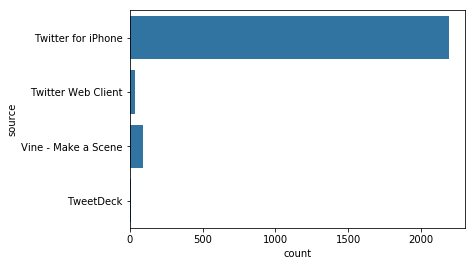

In [63]:
base_color = sb.color_palette()[0]
sb.countplot(data=twitter_arch, y='source', color=base_color);

**From the plot it is evident that most people access twitter via iPhone**

In [64]:
twitter_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8213,37692
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6075,32377
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4017,24383
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8370,41011
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9075,39211


2. Popular stage value

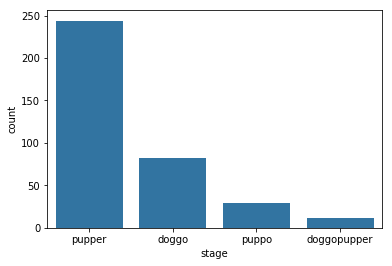

In [65]:
stage_order = twitter_arch.stage.value_counts().head(4).index
sb.countplot(data=twitter_arch,x='stage',order=stage_order,color=base_color);

From the plot it is clear that **Pupper** is the most popular dog stage. But since there are lot of missing values, we cannot conclude this for sure.

3. Let's see which is the most common breed of dog.

In [66]:
image_df.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Text(0.5,0,'Most common breed of dog')

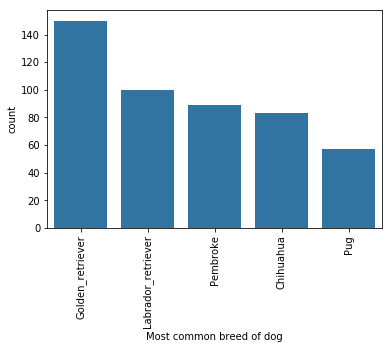

In [67]:
pred_order=image_df.prediction1.value_counts().head().index
sb.countplot(data=image_df,x='prediction1',order=pred_order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.xlabel('Most common breed of dog')

**Golden Retriever** is the most common/popular breed of dog.

### Conclusion

1. Most people access twitter via Iphone.
2. Pupper seems to be the favourite dog stage.
3. Goldern Retriever popular breed of dog.

### Limitations

1. Lot of missing values in 'stage' column values. Hence, we cannot really say for sure that Pupper is favourite dog stage.
2. Some ratings given are wrong i.e. denominator is more than 10.

In [69]:
#Saving cleaned dataframe to a csv file.
twitter_arch.to_csv('twitter_archive_master.csv',index=False)